In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("datasets/heart_disease.xlsx", sheet_name='Heart_disease')
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4
907,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,reversable defect,4


In [4]:
#df.iloc[763:767,:]

In [5]:
# Rename 'num' to 'target' for clarity
df.rename(columns={'num':'target'}, inplace =True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  target    908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
target       0
dtype: int64

In [8]:
df.fillna(df['oldpeak'].mean(), inplace=True)

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df['exang'] = df['exang'].astype(bool)  
df['fbs'] = df['fbs'].astype(object)

obj_cols = df.select_dtypes(include=['object','bool'])
#dcv = df.select_dtypes(exclude='object')


for i in obj_cols:      
    df[i] = LE.fit_transform(df[i])
    #df_new[i] = df[i]

#df_new = pd.DataFrame(df_new)
#df_new.shape

In [12]:
x = df.drop(columns=['target'])

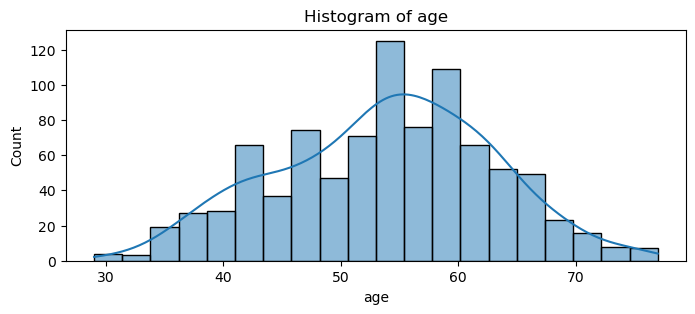

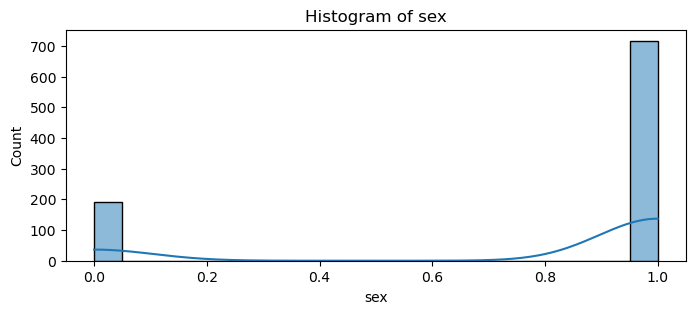

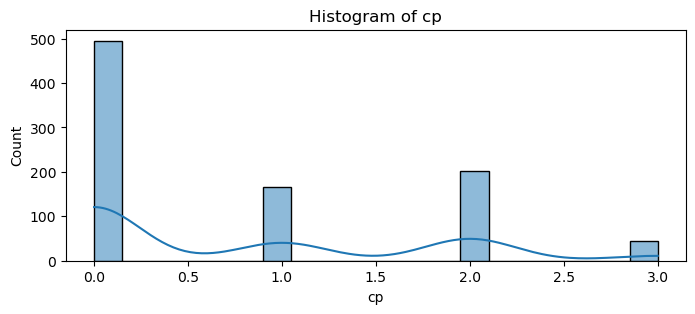

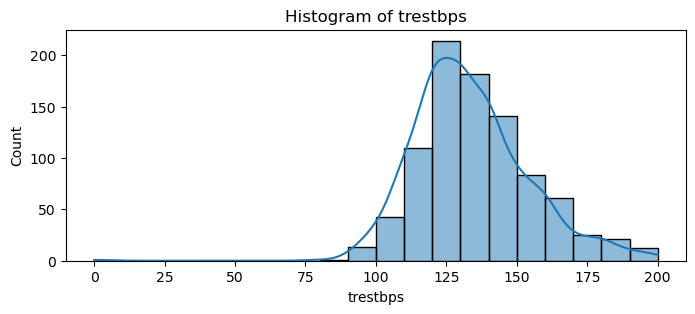

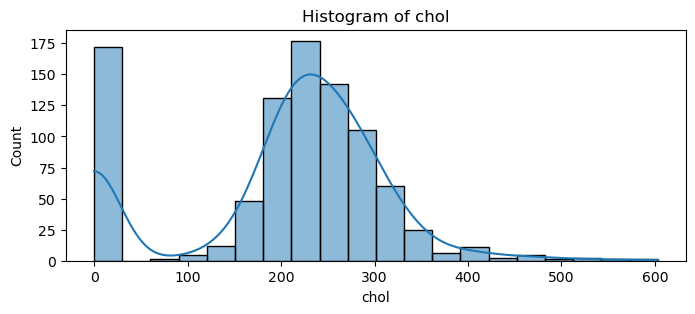

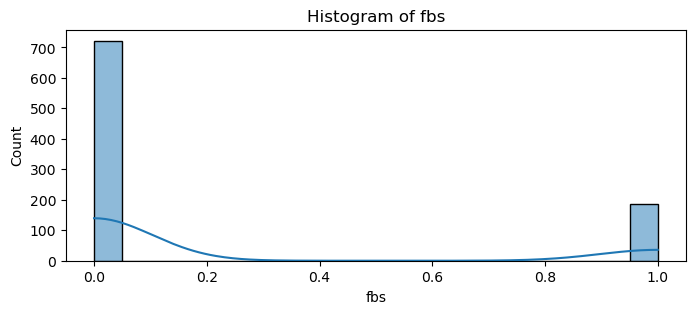

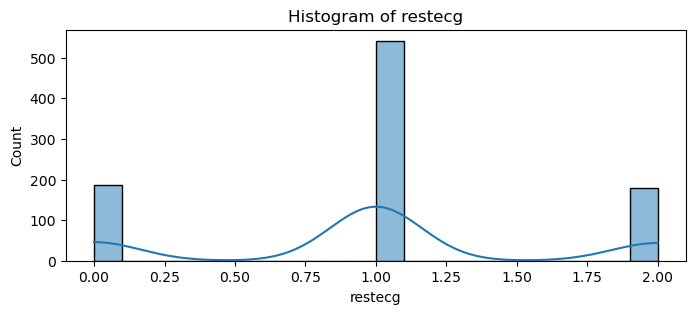

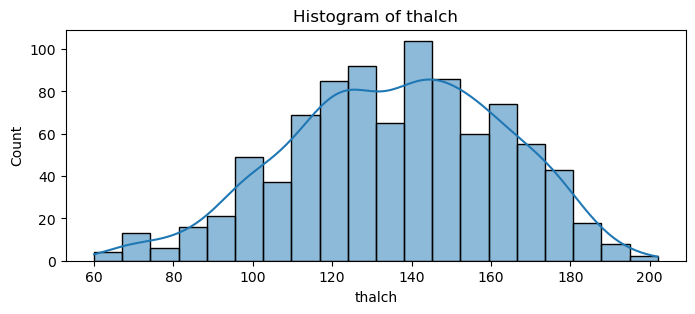

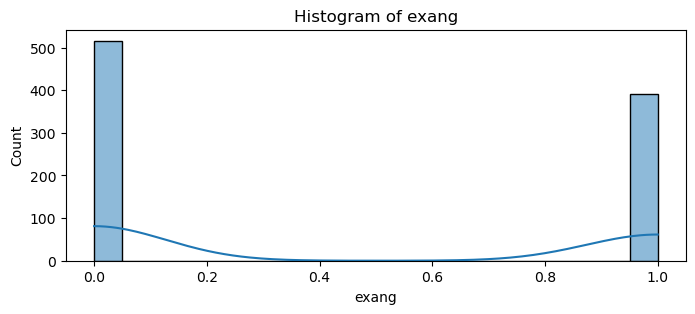

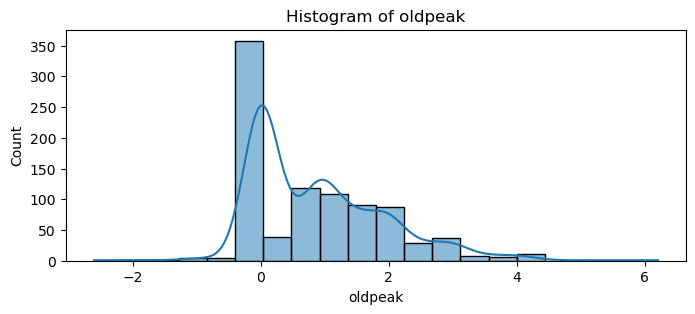

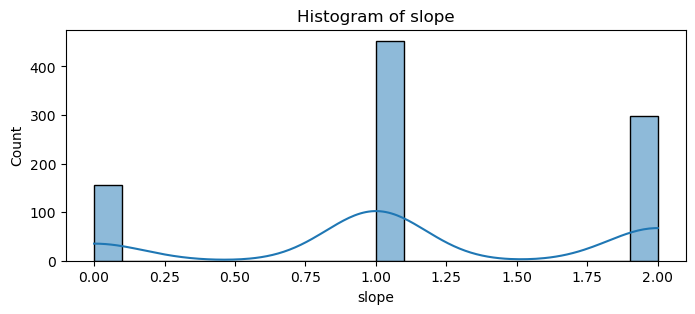

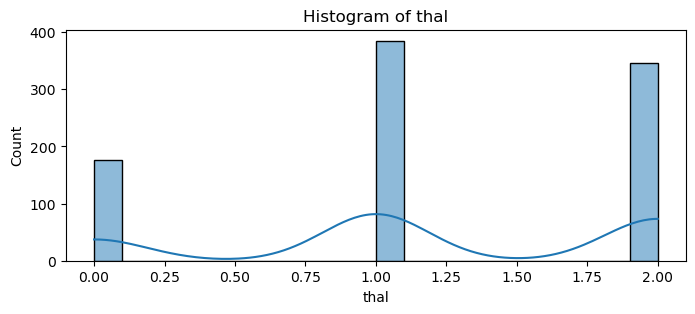

In [13]:
for var in x.columns:
    plt.figure(figsize=(8,3))    
    sb.histplot(df[var],kde=True,bins=20)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.show()

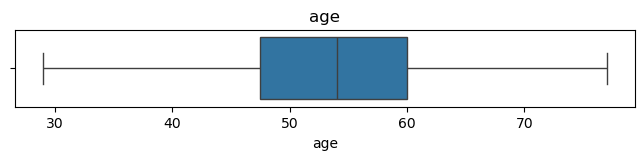

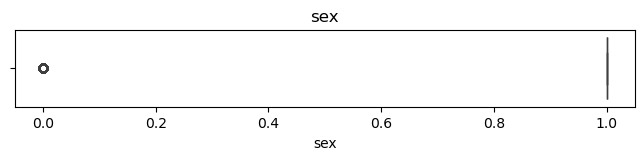

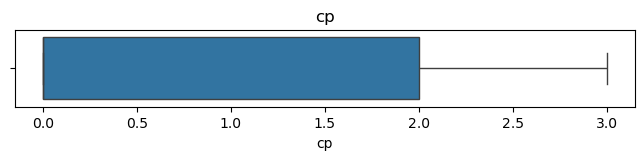

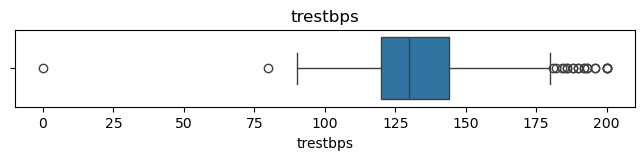

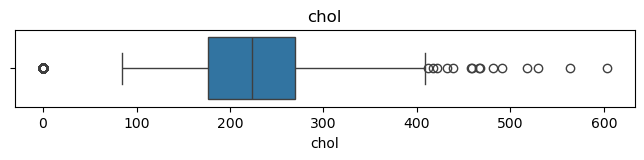

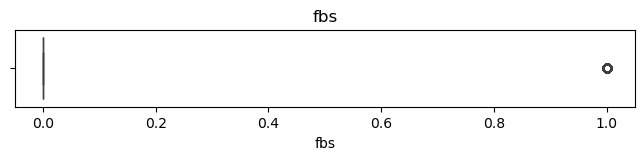

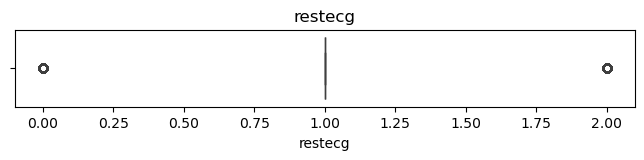

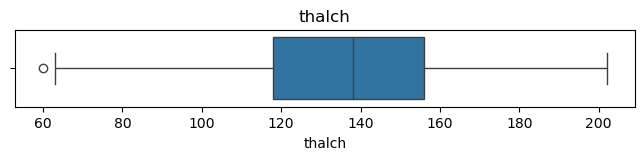

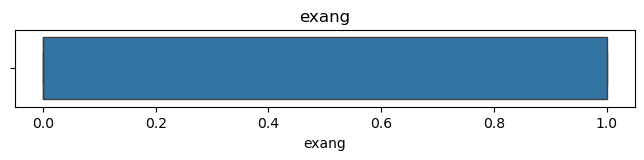

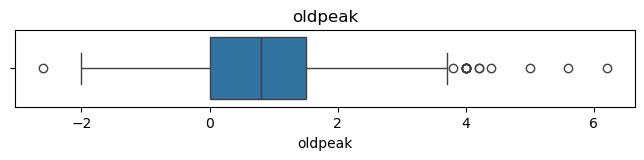

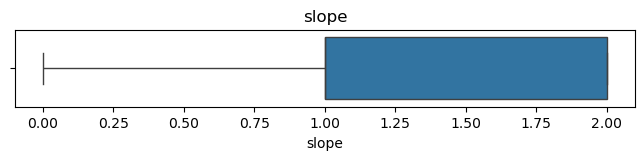

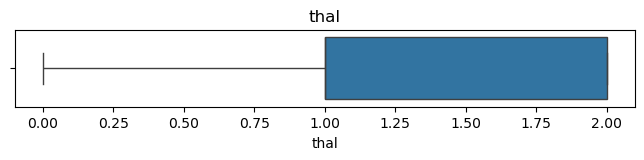

In [14]:
for var in x.columns:    
    plt.figure(figsize=(8,1))
    sb.boxplot(df[var],orient='h')
    plt.title(var)
    plt.show()

In [15]:
outlier_variables = ['trestbps', 'chol', 'fbs', 'restecg','thalch', 'oldpeak']

In [16]:
def outlier_limits(var):
    Q1 = np.percentile(df[var],25)
    Q3 = np.percentile(df[var],75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
      
    return upper_limit, lower_limit    

In [17]:
def check_outliers(var):
    
    upper_w, lower_w = outlier_limits(var) 
    
    if df[( df[var] > upper_w  )|( df[var] < lower_w  )].shape[0]:
        treat_outliers(var, upper_w, lower_w)  

In [18]:
def treat_outliers(var, upper_limit, lower_limit):      
           
    if df[  df[var] < lower_limit ].shape[0]:        
        df.loc[ df[var] < lower_limit, var ] = lower_limit
        
    if df[  df[var] > upper_limit ].shape[0]:        
        df.loc[ df[var] > upper_limit, var ] = upper_limit

In [19]:
for var in outlier_variables:    
    check_outliers(var)

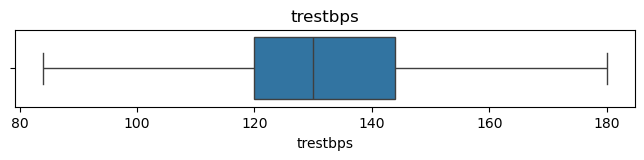

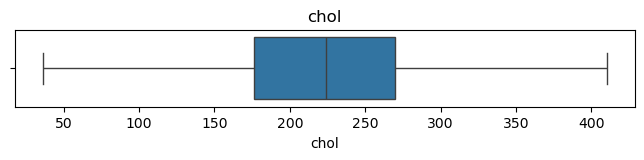

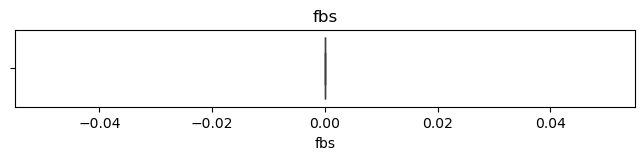

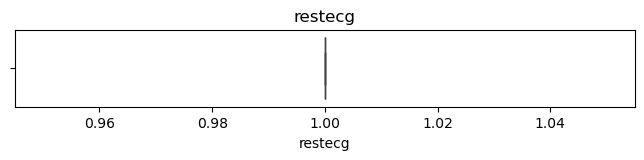

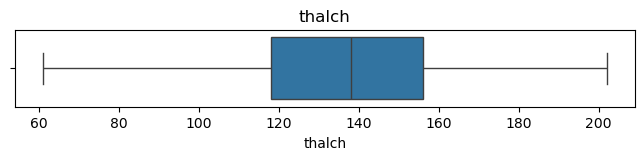

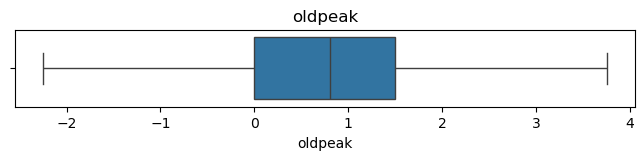

In [20]:
for var in outlier_variables:    
    plt.figure(figsize=(8,1))
    sb.boxplot(df[var],orient='h')
    plt.title(var)
    plt.show()

In [21]:
# standard scaler
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()


df[ df.columns[ [0,3,4,7] ] ] = SS.fit_transform( df[ df.columns[ [0,3,4,7] ] ])
#x_cont= df[ df.columns[ [0,3,4,7] ] ]

#SS_cont = SS.fit_transform( x_cont)
#SS_cont = pd.DataFrame(SS_cont)

#SS_cont.columns =  x_cont.columns



In [23]:
x = df.iloc[:,:12]
y = df.iloc[:,12:]

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from  sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=15)
tree_model.fit(x_train, y_train)

yhat_train = tree_model.predict(x_train)
yhat_test = tree_model.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score, log_loss

print('Training accuracy:')
print(classification_report(y_train, yhat_train))

print('Test accuracy:')
print(classification_report(y_test, yhat_test))

Training accuracy:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       0.99      1.00      1.00       219
           2       1.00      1.00      1.00        85
           3       1.00      0.98      0.99        81
           4       1.00      1.00      1.00        26

    accuracy                           1.00       725
   macro avg       1.00      1.00      1.00       725
weighted avg       1.00      1.00      1.00       725

Test accuracy:
              precision    recall  f1-score   support

           0       0.76      0.66      0.70        85
           1       0.28      0.35      0.31        46
           2       0.05      0.04      0.04        23
           3       0.14      0.12      0.13        26
           4       0.00      0.00      0.00         2

    accuracy                           0.42       182
   macro avg       0.25      0.23      0.24       182
weighted avg       0.45      0.42      0.43

In [29]:
##### =============================================================
# shuffle split
#=============================================================

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=15)

# Set up ShuffleSplit cross-validator
from sklearn.model_selection import ShuffleSplit, cross_validate
shuffle_split = ShuffleSplit(n_splits=200, test_size=0.3, random_state=42)

# Perform cross-validation and collect both train and test scores
cv_results = cross_validate(model, x, y, cv=shuffle_split, scoring='accuracy', return_train_score=True)

# Extract train and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

# Show individual scores and their means
print("cross validation: Train accuracy:" , np.round(train_scores.mean(),2))
print("cross validation: test accuracy:" , np.round(test_scores.mean(),2))


cross validation: Train accuracy: 1.0
cross validation: test accuracy: 0.47


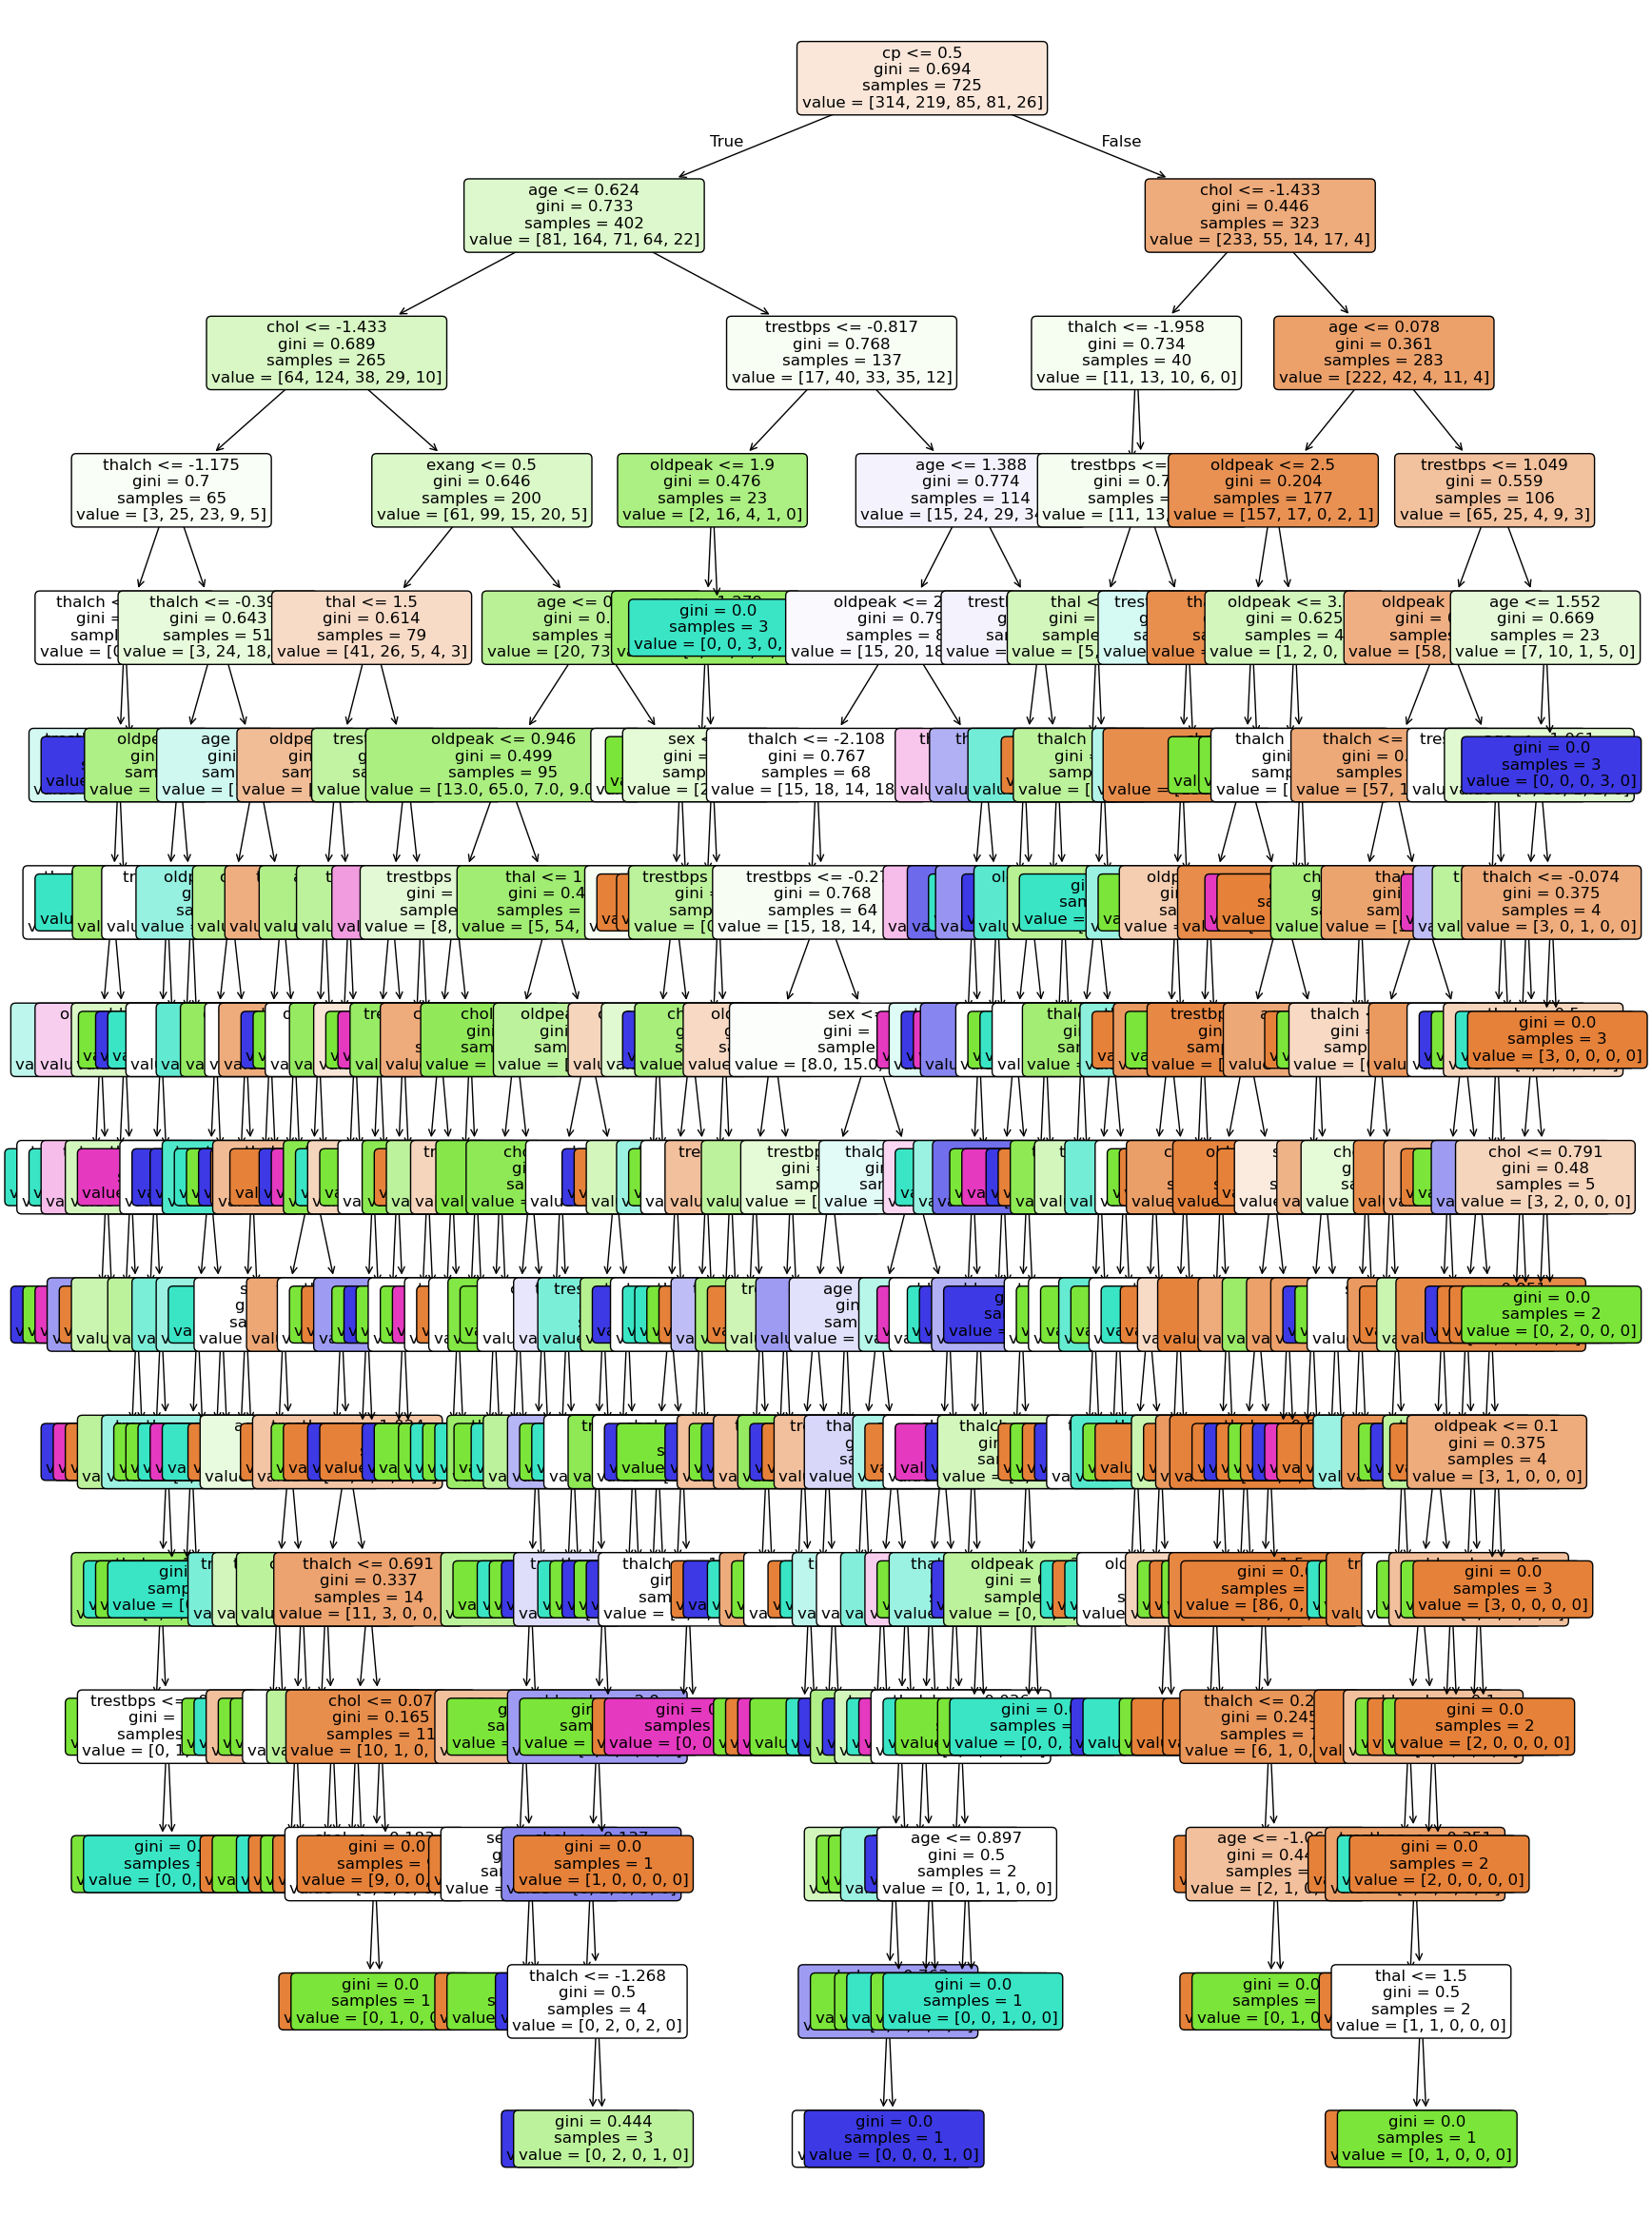

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,30))
plot_tree(tree_model, filled=True, feature_names=x.columns,  rounded=True, fontsize=12)
plt.show()

In [32]:
print(f'number of nodes:{tree_model.tree_.node_count}')
print(f'max depth:{tree_model.tree_.max_depth}')

number of nodes:515
max depth:15


### Q1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

* <i>max_depth</i>: it limits complexity of the tree and prevents overfitting
* <i>criterion</i>: affects purity at each node
* <i>min_sample_split</i>: it controls when decision tree should stop splitting
* <i>min_sample_leaf</i>: it ensures final decision(leaf) has meaningful and enough data
* <i>max_features</i>: limits how many features allow when making nodes
* <i>max_leaf_nodes</i>: limits the number of leaf nodes so that the tree can be easier to interpret

### Q2. What is the difference between the Label encoding and One-hot encoding?

<i>* Label Encoding:</i> LE assigns each category of the column a unique integer
e.g. ['Red','Green','Blue'] = [0,1,2]

<i>* One-Hot Encoding:</i> OHE creates a new binary column for each category
e.g. ['Red','Green','Blue'] =  Red  Green  Blue
                                1     0      0
                                0     1      0
                                0     0      1